In this notebook we want to find comparable properties to what we are doing on the JB land to get comparable values for property taxes for houses.

Basically, we want to find lots in greenfield that are:

1. between 1000 and 1500 sq ft of house
2. Built in last twenty years

and compare their assessed property tax values for the improvements


In [1]:
import pandas as pd

pd.options.display.max_columns = None
from load_data import df, HIDE_USE_DESCS, HIDE_OWNERS

# from ydata_profiling import ProfileReport

In [12]:
ALLOWED_TOWNS = ["greenfield"]
filtered = df.query(
    "CITY.str.lower() == @ALLOWED_TOWNS and USE_DESC != @HIDE_USE_DESCS and OWNER1 != @HIDE_OWNERS and YEAR_BUILT > 2004 and 1000 < RES_AREA < 2000 and NUM_ROOMS > 1"
)
filtered.head()

,BLDG_VAL,LAND_VAL,OTHER_VAL,TOTAL_VAL,FY,LOT_SIZE,LS_DATE,LS_PRICE,USE_CODE,SITE_ADDR,ADDR_NUM,FULL_STR,LOCATION,CITY,ZIP,OWNER1,OWN_ADDR,OWN_CITY,OWN_STATE,OWN_ZIP,OWN_CO,LS_BOOK,LS_PAGE,REG_ID,ZONING,YEAR_BUILT,BLD_AREA,UNITS,RES_AREA,STYLE,STORIES,NUM_ROOMS,LOT_UNITS,CAMA_ID,USE_DESC,rowid,geom
1673,140500,81300,0,221800,2022,1.07,20050404,60000,101,11 CHERRY ST,11,CHERRY ST,,GREENFIELD,01301,CONANT ANDREW B,11 CHERRY STREET,GREENFIELD,MA,01301,,4822,309,,RA,2005,2650,1,1004,CAPE,1,5,A,1042,Single Family Residential,M_110670_929571,"POLYGON ((110705.275 929555.260, 110689.725 92..."
1787,227900,77400,0,305300,2022,0.46,20121029,1,101,33 OVERLAND RD,33,OVERLAND RD,,GREENFIELD,01301,BETE DAVID N,33 OVERLAND ROAD,GREENFIELD,MA,01301,,6277,1,,RB,2006,3464,1,1586,CONTEMPORY,1,7,A,1146,Single Family Residential,M_111451_929635,"POLYGON ((111436.922 929592.764, 111433.883 92..."
1888,221200,55700,69900,346800,2022,2.06,20150701,1,101,258 HOPE ST,258,HOPE ST,,GREENFIELD,01301,KNAPP JENNIFER M,258 HOPE STREET,GREENFIELD,MA,01301,,6709,71,,RA,2015,3912,1,1932,RANCH,1,7,A,1239,Single Family Residential,M_110189_925498,"POLYGON ((110269.682 925348.958, 110256.458 92..."
2142,161300,60800,3200,225300,2022,0.49,20190329,230000,101,148 MERIDIAN ST,148,MERIDIAN ST,,GREENFIELD,01301,BURCH MARGARET T,148 MERIDIAN STREET,GREENFIELD,MA,01301,,7341,279,,RA,2015,3338,1,1852,COLONIAL,2,9,A,1472,Single Family Residential,M_109356_925388,"POLYGON ((109384.444 925396.262, 109375.191 92..."
2539,215500,43000,500,259000,2022,0.16,20180126,25000,101,51 MILL ST,51,MILL ST,,GREENFIELD,01301,PARODY JR FREDERICK V,8 POWER COURT,GREENFIELD,MA,01301,,7153,135,,GC,2018,3256,1,1800,CAPE,1,5,A,1841,Single Family Residential,M_109326_926557,"POLYGON ((109349.664 926560.261, 109330.547 92..."


In [17]:
import altair as alt
from altair import datum

alt.Chart(filtered).mark_circle().encode(
    x=alt.X("RES_AREA").scale(zero=False),
    y=alt.Y("BLDG_VAL").scale(zero=False),
    color="USE_DESC",
    tooltip=["SITE_ADDR"],
    size=alt.Size("YEAR_BUILT").scale(zero=False),
).interactive()

alt.Chart(...)

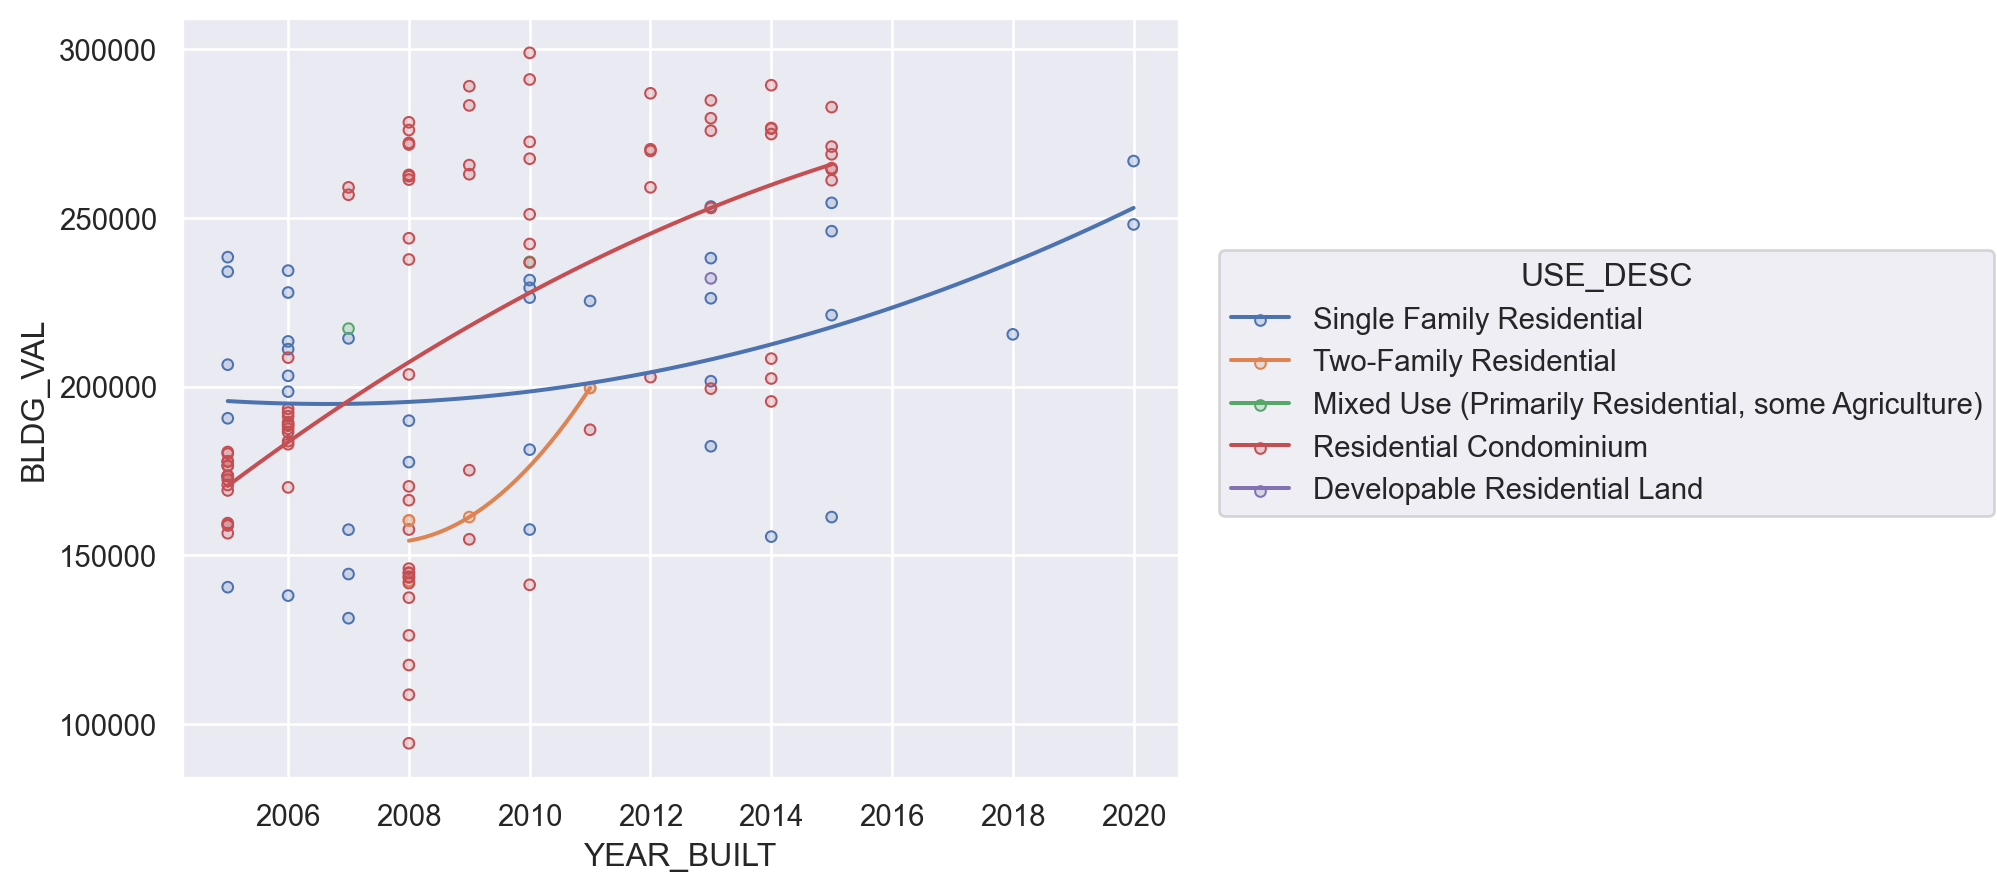

In [29]:
import seaborn.objects as so

(
    so.Plot(
        filtered,
        x="YEAR_BUILT",
        y="BLDG_VAL",
        color="USE_DESC",  # pointsize="YEAR_BUILT"
    )
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)